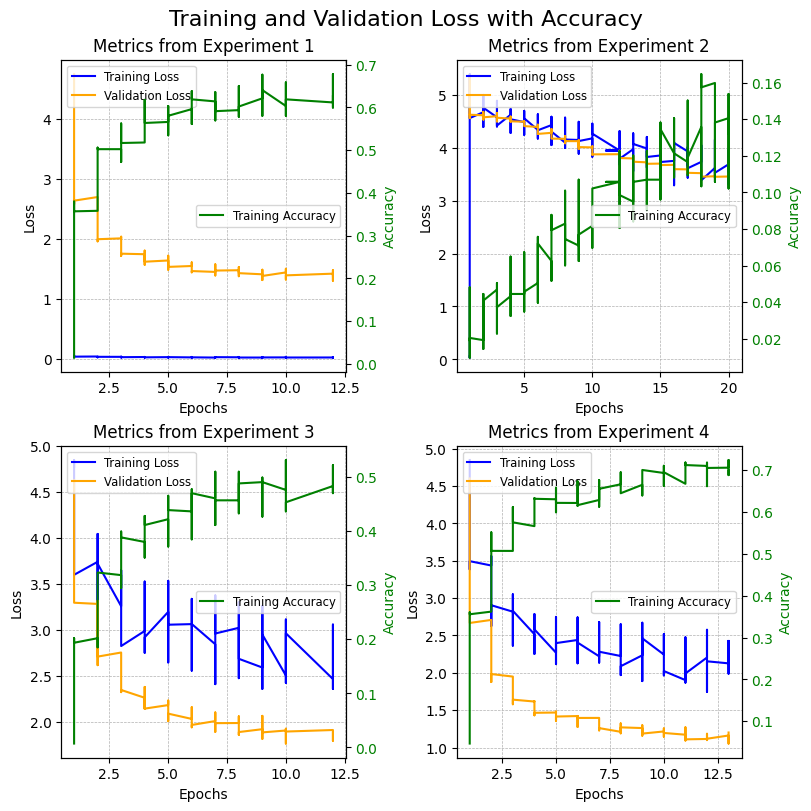

In [64]:
import os
import matplotlib.pyplot as plt
import pickle

# Initialize lists to store metrics from each file
epoch_n_list = []
train_losses_list = []
valid_losses_list = []
train_acc_list = []

# Specify the file paths
file_paths = [f'losses/losses_{i}.pkl' for i in range(1, 5)]

# Loop through the files and load metrics
for file_path in file_paths:
    # Load the metrics from the file
    try:
        with open(file_path, 'rb') as file:
            metrics = pickle.load(file)

        # Append the metrics to the lists
        epoch_n_list.append(metrics['epoch_n'])
        train_losses_list.append(metrics['train_losses'])
        valid_losses_list.append(metrics['valid_losses'])
        train_acc_list.append(metrics['train_acc'])
    except FileNotFoundError as e:
        print(f"File not found: {file_path}")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)

# Define colors for clarity
colors = ["blue", "orange", "green"]

# Add a suitable title for the entire figure
fig.suptitle('Training and Validation Loss with Accuracy', fontsize=16)

# Loop through each subplot and plot data
for i, ax in enumerate(axs.flat):
    if i < len(epoch_n_list):  # Ensure there are enough metrics
        epoch_n = epoch_n_list[i]
        train_losses = train_losses_list[i]
        valid_losses = valid_losses_list[i]
        train_acc = train_acc_list[i]

        # Plot Training and Validation Loss
        ax.plot(epoch_n, train_losses, label='Training Loss', color=colors[0])
        ax.plot(epoch_n, valid_losses, label='Validation Loss', color=colors[1])

        # Create twin axis for Accuracy
        ax_twin = ax.twinx()
        ax_twin.plot(epoch_n, train_acc, label='Training Accuracy', color=colors[2])
        ax_twin.set_ylabel('Accuracy', color=colors[2])
        ax_twin.tick_params(axis='y', labelcolor=colors[2])

        # Set labels and grid
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.grid(True, linestyle='--', linewidth=0.5)

        # Add legends
        ax.legend(loc='upper left', fontsize='small')
        ax_twin.legend(loc='center right', fontsize='small')

        # Add a title for each subplot
        ax.set_title(f'Metrics from Experiment {i+1}')

# Save the figure as an SVG file
# plt.savefig('my_plots.svg', format='svg', bbox_inches='tight')
plt.show()

In [ ]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrices(filename):
    # Check if the file exists
    if os.path.exists(filename):
        # Load the metrics data
        with open(filename, 'rb') as f:
            data = pickle.load(f)
            
            # Extract confusion matrices
            confusion_matrices = data.get('confusion_matrices', [])
            
            # Plot each confusion matrix
            for epoch, matrix in enumerate(confusion_matrices, start=1):
                plt.figure(figsize=(8, 6))
                sns.heatmap(np.array(matrix), annot=True, fmt="d", cmap="Blues", cbar=False)
                plt.title(f"Confusion Matrix for Epoch {epoch}")
                plt.xlabel("Predicted Labels")
                plt.ylabel("True Labels")
                plt.show()
    else:
        print("Metrics file does not exist.")

# Usage
plot_confusion_matrices('losses/next/losses_1.pkl')
